In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from scipy.stats import spearmanr
from scipy.stats import skew, kurtosis, norm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.utils.validation import check_is_fitted
from sklearn.impute import SimpleImputer
import plotly.express as px
import plotly.graph_objects as go
from category_encoders import OneHotEncoder
from IPython.display import VimeoVideo
from sklearn.linear_model import LinearRegression, Ridge  



import plotly.express as px

In [25]:
df = pd.read_csv(r"C:\Users\Nassoh\Desktop\DataSienceMyProject\Dubai Houses analize\Data\Dubai.csv")
print(df.shape)
df.head()   

(1905, 38)


,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,...,False,False,True,False,False,False,False,False,True,False
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,...,False,False,True,True,False,False,False,False,True,False
2,6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,...,False,True,True,True,False,False,False,True,True,True
3,6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,...,False,False,False,False,False,False,False,False,False,False
4,6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,...,False,True,True,True,True,False,False,True,True,False


In [26]:
# Drop the specified columns
df = df.drop(['id','latitude','longitude','price'], axis=1)
df

,neighborhood,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,unfurnished,balcony,barbecue_area,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,Palm Jumeirah,1079,2502.32,1,2,Medium,False,False,True,True,...,False,False,True,False,False,False,False,False,True,False
1,Palm Jumeirah,1582,1801.52,2,2,Medium,False,False,True,False,...,False,False,True,True,False,False,False,False,True,False
2,Jumeirah Lake Towers,1951,589.44,3,5,Medium,True,True,True,False,...,False,True,True,True,False,False,False,True,True,True
3,Culture Village,2020,1410.89,2,3,Low,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
4,Palm Jumeirah,507,3410.65,0,1,Medium,False,False,False,False,...,False,True,True,True,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,Mohammed Bin Rashid City,1087,1379.94,2,2,Ultra,False,True,True,True,...,False,True,True,True,True,True,True,True,True,True
1901,Mohammed Bin Rashid City,760,1618.42,1,2,Medium,False,False,True,False,...,False,False,True,True,False,False,False,False,True,True
1902,Dubai Creek Harbour (The Lagoons),1930,1502.59,3,5,Medium,True,True,True,False,...,False,False,False,True,False,False,False,False,False,False
1903,Jumeirah Village Circle,740,912.16,1,2,Medium,False,True,True,False,...,False,True,True,True,False,False,False,False,True,True


# Spilt

In [27]:
target = "price_per_sqft"
y =df[target]
X =df.drop(['price_per_sqft'],axis=1)

In [28]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=42)

# Baseline

In [29]:
y_mean =y_train.mean()
y_mean
y_pred_baseline =[y_mean]*len(y_train)
len(y_pred_baseline)
mae_baseline =mean_absolute_error(y_train,y_pred_baseline)
print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price 1341.24
Baseline MAE: 499.04


# Build Model

In [30]:
from category_encoders import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
clf =make_pipeline(OrdinalEncoder(),RandomForestRegressor(random_state=42))
print(clf)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])


In [31]:
params ={
    'randomforestregressor__n_estimators':range(25,100,25),
    'randomforestregressor__max_depth':range(10,50,10)
}
params

{'randomforestregressor__n_estimators': range(25, 100, 25),
 'randomforestregressor__max_depth': range(10, 50, 10)}

In [32]:
from sklearn.model_selection import GridSearchCV


model = GridSearchCV(
    clf,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': range(10, 50, 10),
                         'randomforestregressor__n_estimators': range(25, 100, 25)},
             verbose=1)

In [33]:
# Train model
model.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': range(10, 50, 10),
                         'randomforestregressor__n_estimators': range(25, 100, 25)},
             verbose=1)

In [35]:
cv_results =pd.DataFrame(model.cv_results_)
cv_results_sorted = cv_results.sort_values(by='rank_test_score')
cv_results_sorted

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestregressor__max_depth,param_randomforestregressor__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,1.060999,0.093772,0.026401,0.001856,30,75,"{'randomforestregressor__max_depth': 30, 'rand...",0.522180,0.355432,0.579610,0.552368,0.526139,0.507146,0.078613,1
11,0.895599,0.036570,0.018402,0.001746,40,75,"{'randomforestregressor__max_depth': 40, 'rand...",0.522180,0.354396,0.579872,0.551311,0.526139,0.506780,0.078941,2
5,1.110199,0.128650,0.031800,0.005419,20,75,"{'randomforestregressor__max_depth': 20, 'rand...",0.519085,0.363488,0.572306,0.552911,0.522631,0.506084,0.073966,3
4,0.726999,0.080984,0.025001,0.004858,20,50,"{'randomforestregressor__max_depth': 20, 'rand...",0.508503,0.357754,0.569566,0.559958,0.518579,0.502872,0.076216,4
7,0.746200,0.079818,0.023400,0.003073,30,50,"{'randomforestregressor__max_depth': 30, 'rand...",0.508755,0.345645,0.571438,0.562245,0.521483,0.501913,0.081637,5
10,0.709999,0.047645,0.020000,0.001414,40,50,"{'randomforestregressor__max_depth': 40, 'rand...",0.508755,0.344031,0.571438,0.561401,0.521483,0.501421,0.082131,6
2,0.739800,0.047797,0.026000,0.003097,10,75,"{'randomforestregressor__max_depth': 10, 'rand...",0.520493,0.364173,0.567820,0.543290,0.496937,0.498543,0.071192,7
1,0.517397,0.039776,0.021200,0.002136,10,50,"{'randomforestregressor__max_depth': 10, 'rand...",0.512285,0.357812,0.565504,0.549869,0.503121,0.497718,0.073661,8
3,0.359999,0.038052,0.016000,0.000633,20,25,"{'randomforestregressor__max_depth': 20, 'rand...",0.490241,0.336898,0.551074,0.556411,0.506941,0.488313,0.079817,9
0,0.279597,0.023149,0.019001,0.004560,10,25,"{'randomforestregressor__max_depth': 10, 'rand...",0.505314,0.332592,0.554496,0.539095,0.491397,0.484579,0.079293,10


In [36]:
mask=cv_results['rank_test_score']==1
cv_results[mask]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestregressor__max_depth,param_randomforestregressor__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,1.060999,0.093772,0.026401,0.001856,30,75,"{'randomforestregressor__max_depth': 30, 'rand...",0.52218,0.355432,0.57961,0.552368,0.526139,0.507146,0.078613,1


In [37]:
# Extract best hyperparameters
model.best_params_

{'randomforestregressor__max_depth': 30,
 'randomforestregressor__n_estimators': 75}

In [38]:
model.best_score_

0.5071459555009199

In [39]:
model.best_estimator_

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['neighborhood', 'quality'],
                                mapping=[{'col': 'neighborhood',
                                          'data_type': dtype('O'),
                                          'mapping': Town Square                           1
Downtown Dubai                        2
Palm Jumeirah                         3
Jumeirah Village Circle               4
Discovery Gardens                     5
Dubai Marina                          6
Jumeirah Beach Residence              7
The Views                             8
Dubai Hills Estate                    9
Dubai Sports City                    10
Al Sufouh                            11
Business Bay                         12
World Trade Center                   13
Motor City...
Green Community                      46
International City                   47
Falcon City of Wonders               48
Al Barsha                            49
Dubai Festival City                  50
Dubai Residence Complex              51
Jumeirah Village Triangle            52
Jebel Ali                            53
Mina Rashid                          54
NaN                                  -2
dtype: int64},
                                         {'col': 'quality',
                                          'data_type': dtype('O'),
                                          'mapping': Medium    1
Ultra     2
Low       3
High      4
NaN      -2
dtype: int64}])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=30, n_estimators=75,
                                       random_state=42))])

# Evaluate

In [40]:
y_pred_training =model.predict(X_train)
y_pred_test =model.predict(X_test)
mae_training =mean_absolute_error(y_train,y_pred_training)
mae_test =mean_absolute_error(y_test,y_pred_test)
print("Baseline MAE:", round(mae_baseline, 2))
print("Training MAE:", round(mae_training, 2))
print("Test MAE:", round(mae_test, 2))


Baseline MAE: 499.04
Training MAE: 118.93
Test MAE: 329.62


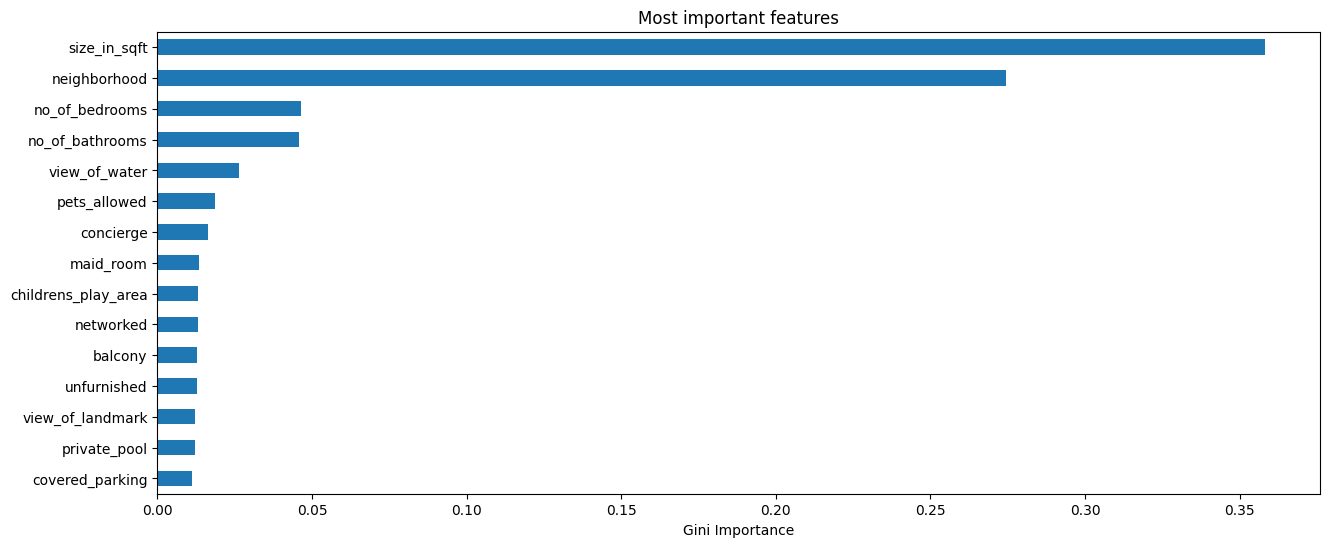

In [43]:
fig, ax = plt.subplots(figsize=(15, 6))
# Get feature names from training data
features =X_train.columns
# Extract importances from model
importances =model.best_estimator_.named_steps[
    'randomforestregressor'
].feature_importances_
# Create a series with feature names and importances
feat_imp =pd.Series(importances,index=features).sort_values()
# Plot 10 most important features
feat_imp.tail(15).plot(kind='barh')
plt.xlabel("Gini Importance")
#plt.ylabel("Feature")
plt.title("Most important features")
plt.show()